In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


## Import do dataset

In [93]:
# Importando dataset para análise, já removendo características de baixa relevância
data = pd.read_csv('playlist_2010to2023.csv', encoding='ISO-8859-1').drop(['playlist_url', 'track_id', 'artist_id'], axis=1)

## Exibição de características do dataset

In [94]:
print(data.head())
print(data.info())
print(data.columns)

   year              track_name  track_popularity                    album  \
0  2000  Oops!...I Did It Again                81  Oops!... I Did It Again   
1  2000    All The Small Things                83       Enema Of The State   
2  2000                 Breathe                66                  Breathe   
3  2000            It's My Life                81                    Crush   
4  2000             Bye Bye Bye                75      No Strings Attached   

      artist_name                                      artist_genres  \
0  Britney Spears                               ['dance pop', 'pop']   
1       blink-182  ['alternative metal', 'modern rock', 'pop punk...   
2      Faith Hill  ['contemporary country', 'country', 'country d...   
3        Bon Jovi                             ['glam metal', 'rock']   
4          *NSYNC                   ['boy band', 'dance pop', 'pop']   

   artist_popularity  danceability  energy  key  loudness  mode  speechiness  \
0                 

## Exibir a distribuição da popularidade das faixas

c:\Matheus\Inatel\Python\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


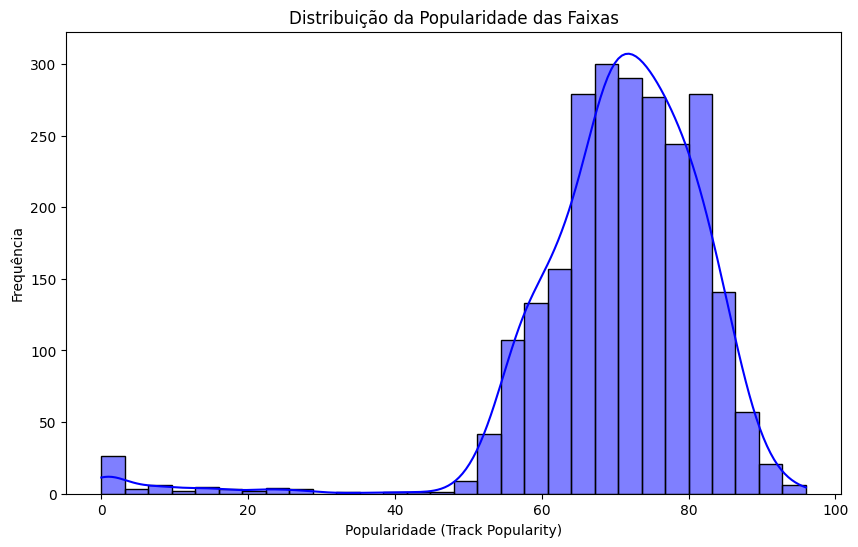

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data['track_popularity'], kde=True, bins=30, color='blue')
plt.title('Distribuição da Popularidade das Faixas')
plt.xlabel('Popularidade (Track Popularity)')
plt.ylabel('Frequência')
plt.show()

## Análise da Relação Energia x Popularidade

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


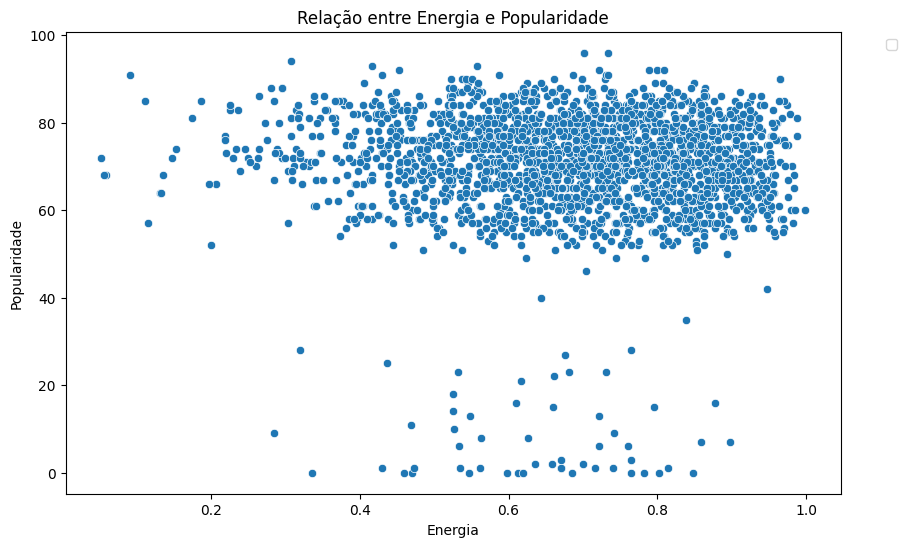

In [96]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='track_popularity', data=data)
plt.title('Relação entre Energia e Popularidade')
plt.xlabel('Energia')
plt.ylabel('Popularidade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Pré-processamento dos dados

In [97]:
# Filtrar dados relevantes e tratar valores ausentes
data = data.dropna()
data = data[data['track_popularity'] > 0]  # Remover músicas sem popularidade

# Selecionar colunas importantes
columns_to_use = [
    'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'track_popularity']
data = data[columns_to_use]

# Transformar popularidade em uma variável categórica: Sucesso (>50) ou Não Sucesso (<=50)
data['success'] = (data['track_popularity'] > 50).astype(int)
track_popularity = data['track_popularity']
data = data.drop('track_popularity', axis=1)

# Divisão entre variáveis independentes (X) e dependentes (y)
X = data.drop('success', axis=1)
y = data['success']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo

In [98]:
# Usando RandomForestClassifier para previsão
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:
# Fazer previsões
y_pred = model.predict(X_test)

## Avaliação do modelo treinado

In [100]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.2f}")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do Modelo: 0.98
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.98      1.00      0.99       466

    accuracy                           0.98       478
   macro avg       0.99      0.54      0.57       478
weighted avg       0.98      0.98      0.97       478



# Criação de dados Fictícios para previsão de sucesso de um novo gênero musical

In [101]:
# Criar dados fictícios para prever o sucesso de um novo gênero musical
n_new_samples = 5
new_data = {
    'danceability': np.random.rand(n_new_samples),
    'energy': np.random.rand(n_new_samples),
    'key': np.random.randint(0, 12, n_new_samples),
    'loudness': np.random.uniform(-60, 0, n_new_samples),
    'mode': np.random.choice([0, 1], n_new_samples),
    'speechiness': np.random.rand(n_new_samples),
    'acousticness': np.random.rand(n_new_samples),
    'instrumentalness': np.random.rand(n_new_samples),
    'liveness': np.random.rand(n_new_samples),
    'valence': np.random.rand(n_new_samples),
    'tempo': np.random.uniform(50, 200, n_new_samples)
}
new_genre_df = pd.DataFrame(new_data)

# Fazer previsões para os novos dados
new_genre_predictions = model.predict(new_genre_df)
new_genre_df['success_prediction'] = new_genre_predictions
print("\nNovos Gêneros e Suas Previsões de Sucesso:")
print(new_genre_df)


Novos Gêneros e Suas Previsões de Sucesso:
   danceability    energy  key   loudness  mode  speechiness  acousticness  \
0      0.802521  0.402775    6 -50.752801     0     0.740668      0.160210   
1      0.411319  0.450244    4 -56.376667     1     0.741024      0.981825   
2      0.323313  0.619606    6 -43.875650     1     0.246819      0.941550   
3      0.657309  0.167519    7 -49.370405     0     0.300845      0.387417   
4      0.764346  0.284272   10 -51.813294     0     0.231263      0.518192   

   instrumentalness  liveness   valence       tempo  success_prediction  
0          0.234071  0.779129  0.699683   53.604328                   1  
1          0.374838  0.568557  0.559008   59.094548                   1  
2          0.399103  0.623447  0.827722   51.518051                   1  
3          0.943596  0.049598  0.502123  120.399060                   1  
4          0.701057  0.197989  0.812578  173.793921                   1  


# Treinamento de novo modelo 

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Selecionar as features e o alvo (target)
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 'tempo']
X = data[features]
y = track_popularity

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_test, y_pred)}")

Erro Quadrático Médio (MSE): 155.57345493816828


## Previsão de popularidade para um novo gênero musical

In [103]:
# Características médias de um gênero novo (exemplo fictício)
new_genre_features = {
    'danceability': 0.6,
    'energy': 0.5,
    'loudness': -5,
    'speechiness': 0.05,
    'acousticness': 0.2,
    'instrumentalness': 0.1,
    'liveness': 0.3,
    'valence': 0.2,
    'tempo': 60,
}

# Transformar em DataFrame para prever
new_genre_df = pd.DataFrame([new_genre_features])
predicted_popularity = model.predict(new_genre_df)
print(f"Popularidade prevista para o novo gênero: {predicted_popularity[0]:.2f}")


Popularidade prevista para o novo gênero: 74.95
